# Quantitative Risk Management

Click <a href="https://colab.research.google.com/github/Lolillosky/QuantRiskManagement/blob/main/NOTEBOOKS/3_AD_Pytorch.ipynb">
    <img src="https://upload.wikimedia.org/wikipedia/commons/d/d0/Google_Colaboratory_SVG_Logo.svg" width="30" alt="Google Colab">
</a> to open this notebook in Google Colab.

## Introduction to AD in Pytorch

In order to install Pythorch in your machine follow the instructions from [Pythorch help](https://pytorch.org/). The library is already installed in Google Colab environment.

In order to import the library:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

### Tensors

In order to be able to compute derivatives, we have to work with Pytorch tensors. These can be initialized from hardcoded values, numpy variables or Pythorch functions.

In [2]:
x = torch.tensor(3.0)

y_numpy = np.linspace(0,2*np.pi,10)

y = torch.tensor(y_numpy)

z = torch.linspace(0,2*np.pi,10)

print(x)
print(y)
print(z)

tensor(3.)
tensor([0.0000, 0.6981, 1.3963, 2.0944, 2.7925, 3.4907, 4.1888, 4.8869, 5.5851,
        6.2832], dtype=torch.float64)
tensor([0.0000, 0.6981, 1.3963, 2.0944, 2.7925, 3.4907, 4.1888, 4.8869, 5.5851,
        6.2832])


The floating point precission can be set when a variable is created. 

In [3]:
x = torch.tensor(3.0, dtype= torch.float64)

y_numpy = np.linspace(0,2*np.pi,10)

y = torch.tensor(y_numpy, dtype= torch.float64)

z = torch.linspace(0,2*np.pi,10, dtype= torch.float64)

print(x)
print(y)
print(z)

tensor(3., dtype=torch.float64)
tensor([0.0000, 0.6981, 1.3963, 2.0944, 2.7925, 3.4907, 4.1888, 4.8869, 5.5851,
        6.2832], dtype=torch.float64)
tensor([0.0000, 0.6981, 1.3963, 2.0944, 2.7925, 3.4907, 4.1888, 4.8869, 5.5851,
        6.2832], dtype=torch.float64)


Default floating point precision can alse be set

In [4]:
torch.set_default_dtype(torch.float64)

In order to be able to perform AD, we must specify it.

In [5]:
x = torch.tensor(3.0, requires_grad=True)
y = torch.tensor(2.0, requires_grad=True)

z = x**2 + x*y

z.backward()

print(x.grad)
print(y.grad)


tensor(8.)
tensor(3.)


With the exception of basic operations (+,-*,/), we must use pytorch functions. Pytorch functions and usage resemble numpy. 

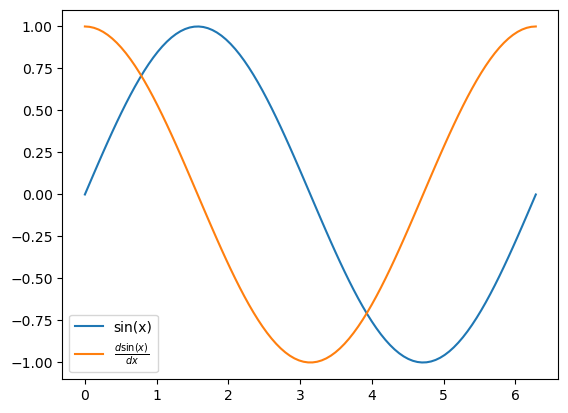

In [6]:
x = torch.linspace(0, 2*np.pi, 100, requires_grad=True)
y = torch.sin(x)
z = torch.sum(y)

z.backward()

grad = x.grad

plt.plot(x.detach().numpy(), y.detach().numpy(), label = 'sin(x)')
plt.plot(x.detach().numpy(), grad, label = r'$\frac{d\sin(x)}{dx}$')

plt.legend()



We can extract the numerical content of every tensor, but in AD has been enabled on the particular tensor, we must first detach it.

In [7]:
x.numpy()

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

In [8]:
x.detach().numpy()

array([0.        , 0.06346652, 0.12693304, 0.19039955, 0.25386607,
       0.31733259, 0.38079911, 0.44426563, 0.50773215, 0.57119866,
       0.63466518, 0.6981317 , 0.76159822, 0.82506474, 0.88853126,
       0.95199777, 1.01546429, 1.07893081, 1.14239733, 1.20586385,
       1.26933037, 1.33279688, 1.3962634 , 1.45972992, 1.52319644,
       1.58666296, 1.65012947, 1.71359599, 1.77706251, 1.84052903,
       1.90399555, 1.96746207, 2.03092858, 2.0943951 , 2.15786162,
       2.22132814, 2.28479466, 2.34826118, 2.41172769, 2.47519421,
       2.53866073, 2.60212725, 2.66559377, 2.72906028, 2.7925268 ,
       2.85599332, 2.91945984, 2.98292636, 3.04639288, 3.10985939,
       3.17332591, 3.23679243, 3.30025895, 3.36372547, 3.42719199,
       3.4906585 , 3.55412502, 3.61759154, 3.68105806, 3.74452458,
       3.8079911 , 3.87145761, 3.93492413, 3.99839065, 4.06185717,
       4.12532369, 4.1887902 , 4.25225672, 4.31572324, 4.37918976,
       4.44265628, 4.5061228 , 4.56958931, 4.63305583, 4.69652

Whenever we compute gradients, the tape is deleted unless we tell Pytorch it.

In [9]:
x = torch.tensor([1.0,2.0,3.0], requires_grad=True)

y = torch.tensor([1.5,3.25,3.47], requires_grad=True)

z1 = torch.sum(x**2 - y**2)
z2 = z1**2


z1.backward()
z2.backward()



RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

In [12]:
x = torch.tensor([1.0,2.0,3.0], requires_grad=True)

y = torch.tensor([1.5,3.25,3.47], requires_grad=True)

z1 = torch.sum(x**2 - y**2)
z2 = z1**2


z1.backward(retain_graph=True)
z2.backward()

print(x.grad)
print(y.grad)



tensor([ -41.4136,  -82.8272, -124.2408])
tensor([ 62.1204, 134.5942, 143.7052])


In [13]:
x = torch.linspace(0, 2*np.pi, 100, requires_grad=True)
y = torch.sin(x)


In [14]:
y

tensor([ 0.0000e+00,  6.3424e-02,  1.2659e-01,  1.8925e-01,  2.5115e-01,
         3.1203e-01,  3.7166e-01,  4.2979e-01,  4.8620e-01,  5.4064e-01,
         5.9291e-01,  6.4279e-01,  6.9008e-01,  7.3459e-01,  7.7615e-01,
         8.1458e-01,  8.4973e-01,  8.8145e-01,  9.0963e-01,  9.3415e-01,
         9.5490e-01,  9.7181e-01,  9.8481e-01,  9.9384e-01,  9.9887e-01,
         9.9987e-01,  9.9685e-01,  9.8982e-01,  9.7880e-01,  9.6384e-01,
         9.4500e-01,  9.2235e-01,  8.9599e-01,  8.6603e-01,  8.3257e-01,
         7.9576e-01,  7.5575e-01,  7.1269e-01,  6.6677e-01,  6.1816e-01,
         5.6706e-01,  5.1368e-01,  4.5823e-01,  4.0093e-01,  3.4202e-01,
         2.8173e-01,  2.2031e-01,  1.5800e-01,  9.5056e-02,  3.1728e-02,
        -3.1728e-02, -9.5056e-02, -1.5800e-01, -2.2031e-01, -2.8173e-01,
        -3.4202e-01, -4.0093e-01, -4.5823e-01, -5.1368e-01, -5.6706e-01,
        -6.1816e-01, -6.6677e-01, -7.1269e-01, -7.5575e-01, -7.9576e-01,
        -8.3257e-01, -8.6603e-01, -8.9599e-01, -9.2